# Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. 
Note that some of the questions are intentionally phrased in a vague way. 
It is your job to reword these as more precise questions that could be tested.


# Has the network latency gone up since we switched internet service providers?

### H0 Switching internet service provider (ISP) did not increase latency
### H0 Switching ISP increase latency

### True positive:
- Testing throughout the day shows no change in network latency between ISPs
### True negative:
- Testing throughout the day shows an increase in network latency betwwwn ISPs
### Type I:  
- We thought testing will display similar resulst between ISPs, it did show an increase in latency
### Type II: 
- We thought testing will display a latency increase between ISPs, it did not show any increase in latency


# Is the website redesign any good?

### H0 The website redesign will increase visitors and interactivity
### H1 The wevsite redesign has no impact on the amount of visitors

### True positive 
- There is an increase number of visitors and time spent in the redesigned website
### True negative
- There has been no change in the amount of visits to the website
### Type I  
- We thought visitors and time spent in the redesigned website would increase, but it has not changed
### Type II 
- We though visitors to redesigned website would stay constant, however it has changed

# Is our television ad driving more sales?

### H0 TV adds have increased sales
### H1 TV adds have not influenced the sales

### True positive 
- TV adds have in fact increased sales of advertised products
### True negative
- TV adds have not influenced sales as there has been no incresed on advertised products
### Type I  
- We thought TV adds had increased sales, but they have not
### Type II 
- We though TV adds had not influenced sales. but they in fact increased

## Continue working in your hypothesis_testing notebook.

- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [263]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [182]:
# H0: There is no difference between the average time to sell homes between offices
# H𝑎: There is a difference between the average time to sell homes between offices

# Office 1
# sample = 40
# mean = 90
# sd = 15

# Office 2
# sample = 50
# mean = 100
# sd = 20

alpha = .05
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t, p


(-2.7091418459143854, 0.00811206270346016)

In [183]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


<AxesSubplot:>

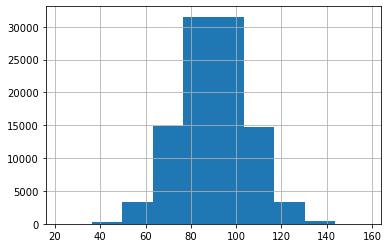

In [184]:
pd.Series(stats.norm(90,15).rvs(100000)).hist()

In [185]:
x = np.arange(50,150)
y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

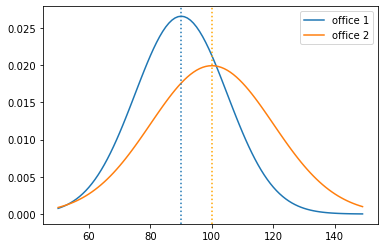

In [186]:
# plot the probability density functions for each office
plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
# throw in an axis vertical line at the mean
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()
plt.show()


- Load the mpg dataset and use it to answer the following questions:

    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
    - Are compact cars more fuel-efficient than the average car?
    - Do manual cars get better gas mileage than automatic cars?

In [187]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [188]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
mpg["average_mileage"] = (mpg.hwy + mpg.cty) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [189]:
fuel_ef08 = mpg[mpg.year == 2008].average_mileage
fuel_ef99 = mpg[mpg.year == 1999].average_mileage

# H0: fuel efficiency is the same for 2008 and 1999 vehicles
# H⍺: fuel efficiency is not the same for 2008 and 1999 vehicles

<AxesSubplot:>

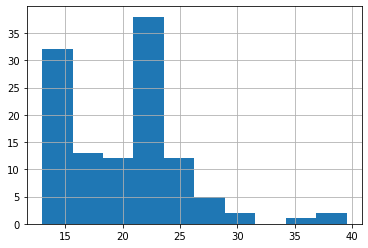

In [190]:
fuel_ef99.hist()

<AxesSubplot:>

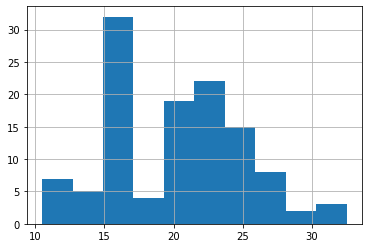

In [191]:
fuel_ef08.hist()

In [192]:
fuel_ef08.count(), fuel_ef99.count()

(117, 117)

In [193]:
fuel_ef08.var(), fuel_ef99.var()

(24.097480106100797, 27.122605363984682)

In [194]:
# # stats Levene test - returns p value. small p-value means unequal variances
# Levene procedure:
# H0: variance is equal in 2008 fuel efficiency and 1999 FE
# Ha: variance is inequal in 2008 FE and 1999 FE
# two-tailed
# if i want to reject H0, p < alpha, which is 0.05
stats.levene(fuel_ef08, fuel_ef99)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

In [195]:
t, p = stats.ttest_ind(fuel_ef99, fuel_ef08)
t, p

(0.21960177245940962, 0.8263744040323578)

In [196]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [197]:
# Are compact cars more fuel-efficient than the average car?
# H0: Compact cars mpg <= Average car mpg
# H⍺: Compact cars mpg > Average car mpg

compact_mpg = mpg[mpg['class'] == 'compact'].average_mileage

In [198]:
compact_mpg.mean()

24.21276595744681

<AxesSubplot:>

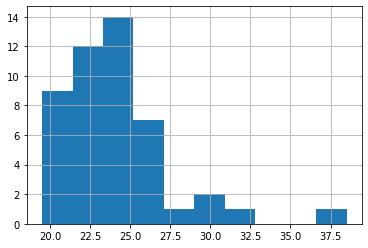

In [199]:
compact_mpg.hist()

In [200]:
t, p = stats.ttest_1samp(compact_mpg, mpg.average_mileage.mean())
t, p

(7.896888573132535, 4.1985637943171336e-10)

In [201]:
if (p/2 < alpha) and (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [202]:
# Do manual cars get better gas mileage than automatic cars?
# H0: Manual cars mpg <= Automatic cars mpg
# H⍺: Manual cars mpg > Automatic cars mpg

manual_mpg = mpg[mpg.trans.str.startswith('manual')].average_mileage
auto_mpg = mpg[mpg.trans.str.startswith('auto')].average_mileage

<AxesSubplot:>

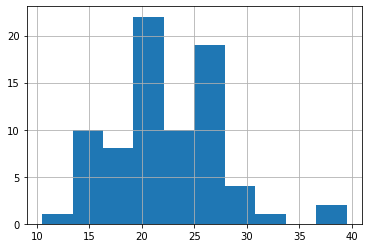

In [203]:
manual_mpg.hist()

<AxesSubplot:>

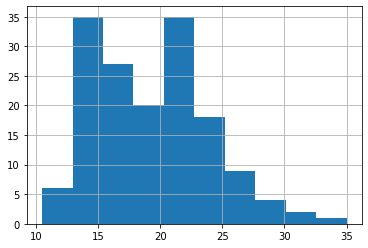

In [204]:
auto_mpg.hist()

In [205]:
manual_mpg.var(), auto_mpg.var()

(26.635167464114826, 21.942777233382337)

In [206]:
stats.levene(manual_mpg,auto_mpg)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [207]:
t, p = stats.ttest_ind(manual_mpg, auto_mpg)
t, p/2, alpha

(4.593437735750014, 3.5771872005728416e-06, 0.05)

In [208]:
if (p/2 < alpha) and (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# Continue working in your hypothesis_testing notebook.
1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?


In [209]:
from math import sqrt

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

alpha = .05

In [210]:
telco = pd.read_csv("cust_churn_telco.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [211]:
# Does tenure correlate with monthly charges?
# 𝐻0 : There is no linear correlation between tenure and monthly charges.
# 𝐻𝑎 : There is a linear correlation between tenure and monthly charges.

r, p = stats.pearsonr(telco.tenure, telco.MonthlyCharges)
r, p

(0.2478998562861525, 4.094044991483017e-99)

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

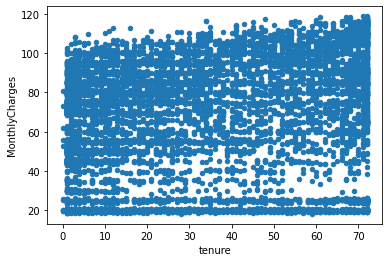

In [212]:
telco.plot.scatter(x='tenure', y='MonthlyCharges')

In [213]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [214]:
telco = telco.dropna(0)

/var/folders/_v/lfgsfb3n229bdhyjm1pj7f840000gn/T/ipykernel_3025/2359978179.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  telco = telco.dropna(0)


In [215]:
# Does tenure correlate with total charges?
# 𝐻0 : There is no linear correlation between tenure and total charges.
# 𝐻𝑎 : There is a linear correlation between tenure and total charges.


r, p = stats.pearsonr(telco.tenure, telco.TotalCharges)
r, p

(0.8258804609332093, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

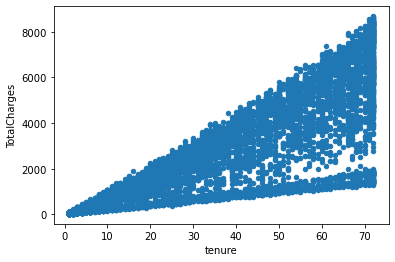

In [216]:
telco.plot.scatter(x='tenure', y='TotalCharges')

In [217]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


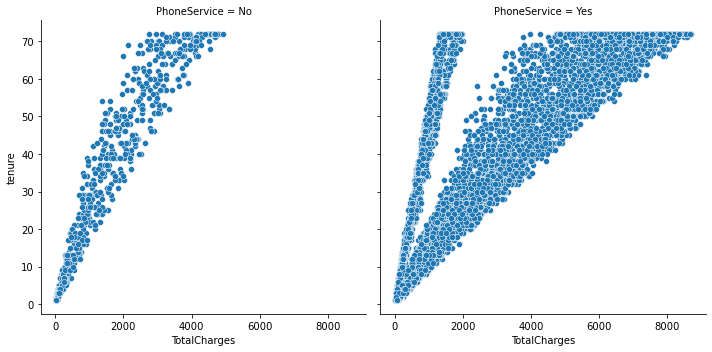

In [218]:
# What happens if you control for phone and internet service?

sns.relplot(data=telco, y='tenure', x='TotalCharges', col='PhoneService')


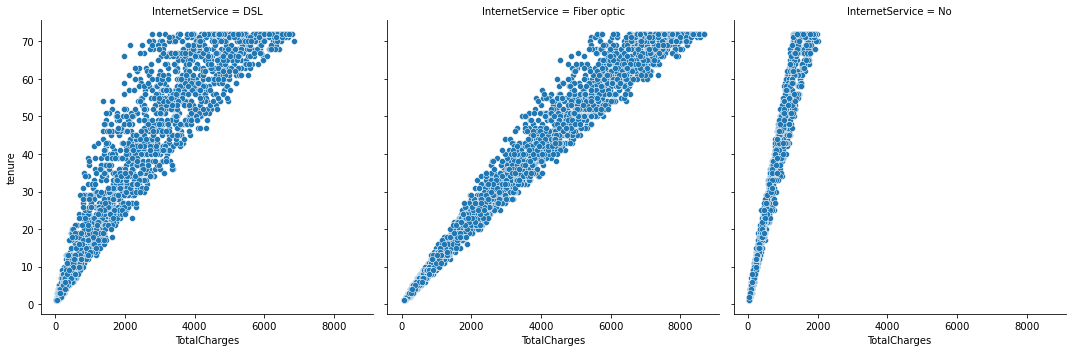

In [219]:
sns.relplot(data=telco, y='tenure', x='TotalCharges', col='InternetService')

In [220]:
telco.MultipleLines = telco.MultipleLines.replace('No','One Line')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [221]:
telco.MultipleLines = telco.MultipleLines.replace('Yes','Multi Line')

In [222]:
telco.InternetService = telco.InternetService.replace('No', 'No Internet')

In [223]:
telco["setup"] = telco.InternetService + " " + telco.MultipleLines
telco.head()

/var/folders/_v/lfgsfb3n229bdhyjm1pj7f840000gn/T/ipykernel_3025/999358448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco["setup"] = telco.InternetService + " " + telco.MultipleLines


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,setup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,DSL No phone service
1,5575-GNVDE,Male,0,No,No,34,Yes,One Line,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,DSL One Line
2,3668-QPYBK,Male,0,No,No,2,Yes,One Line,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,DSL One Line
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,DSL No phone service
4,9237-HQITU,Female,0,No,No,2,Yes,One Line,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Fiber optic One Line


In [224]:
telco.setup.value_counts()

Fiber optic Multi Line    1938
No Internet One Line      1180
Fiber optic One Line      1158
DSL One Line              1047
DSL Multi Line             689
DSL No phone service       680
No Internet Multi Line     340
Name: setup, dtype: int64

In [240]:
options = telco.setup.value_counts().index
options

Index(['Fiber optic Multi Line', 'No Internet One Line',
       'Fiber optic One Line', 'DSL One Line', 'DSL Multi Line',
       'DSL No phone service', 'No Internet Multi Line'],
      dtype='object')

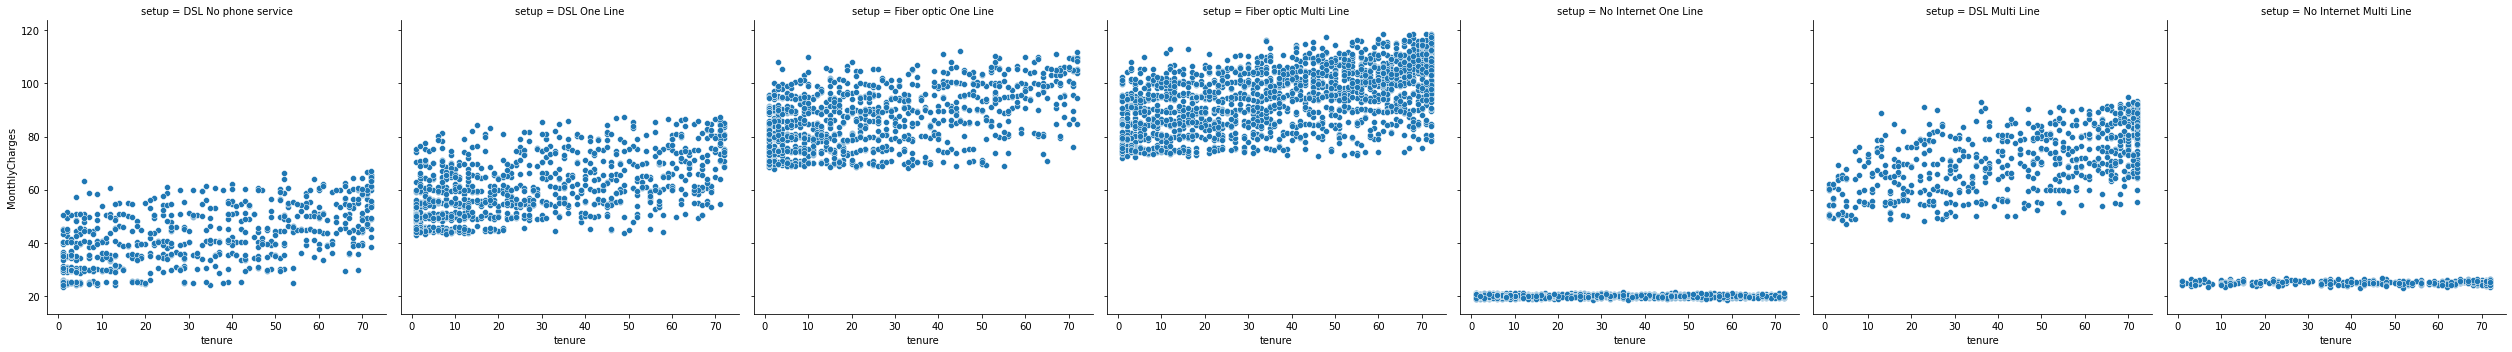

In [255]:
sns.relplot(data=telco, x='tenure', y='MonthlyCharges', col='setup')

In [245]:
output = []
for option in options:
    subset = telco[telco.setup == option]
    r, p = stats.pearsonr(subset.tenure, subset.MonthlyCharges)
    if (p < alpha):
        message = "We reject the null hypothesis"
    else:
        message = "We fail to reject the null hypothesis"
    result = {
        'option': option,
        'r' : r,
        'p' : p,
        'message' : message
    }
    output.append(result)
pd.DataFrame(output)

,option,r,p,message
0,Fiber optic Multi Line,0.573212,1.083568e-169,We reject the null hypothesis
1,No Internet One Line,-0.012140,6.769684e-01,We fail to reject the null hypothesis
2,Fiber optic One Line,0.528906,1.881036e-84,We reject the null hypothesis
3,DSL One Line,0.562023,3.174262e-88,We reject the null hypothesis
4,DSL Multi Line,0.609170,3.258127e-71,We reject the null hypothesis
5,DSL No phone service,0.592430,1.173274e-65,We reject the null hypothesis
6,No Internet Multi Line,-0.033216,5.416047e-01,We fail to reject the null hypothesis


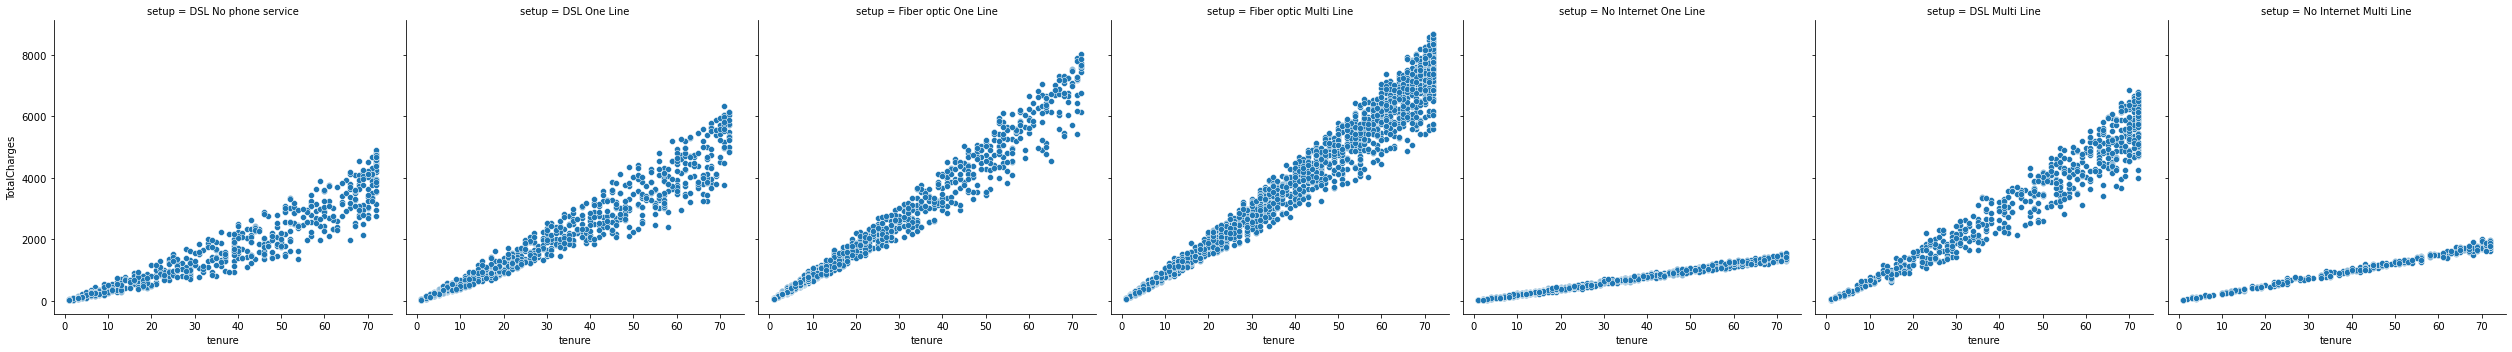

In [254]:
sns.relplot(data=telco, x='tenure', y='TotalCharges', col='setup')

In [251]:
output = []
for option in options:
    subset = telco[telco.setup == option]
    r, p = stats.pearsonr(subset.tenure, subset.TotalCharges)
    if (p < alpha):
        message = "We reject the null hypothesis"
    else:
        message = "We fail to reject the null hypothesis"
    result = {
        'option': option,
        'r' : r,
        'p' : p,
        'message' : message
    }
    output.append(result)
pd.DataFrame(output)

,option,r,p,message
0,Fiber optic Multi Line,0.983112,0.0,We reject the null hypothesis
1,No Internet One Line,0.996779,0.0,We reject the null hypothesis
2,Fiber optic One Line,0.986829,0.0,We reject the null hypothesis
3,DSL One Line,0.973611,0.0,We reject the null hypothesis
4,DSL Multi Line,0.965781,0.0,We reject the null hypothesis
5,DSL No phone service,0.953423,0.0,We reject the null hypothesis
6,No Internet Multi Line,0.994139,0.0,We reject the null hypothesis


2. Use the employees database.
    - Is there a relationship between how long an employee has been with the company and their salary?
    - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [274]:
from env import get_db_url

url = get_db_url('employees')

query = '''
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''

e_with_s = pd.read_sql(query, url)


In [275]:
e_with_s.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


In [278]:
# Is there a relationship between how long an employee has been with the company and their salary?
r, p = stats.pearsonr(e_with_s.tenure, e_with_s.salary)
r, p

(0.3064625613186086, 0.0)

In [280]:
# H0 : There is no linear correlation between tenure and salary
# H⍺: There is a linear correlation between tenure and salary

if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


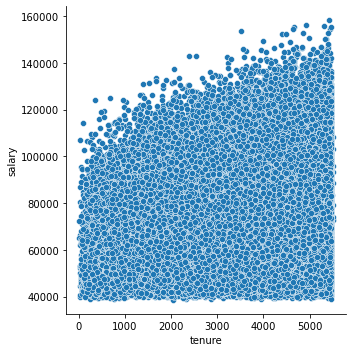

In [281]:
sns.relplot(data= e_with_s, x= 'tenure', y='salary')

In [282]:
# Is there a relationship between how long an employee has been with the company and the number of titles they have had?
query = '''
WITH emp_title_count AS (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
)
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN emp_title_count USING (emp_no)
'''

e_with_t = pd.read_sql(query, url)

In [283]:
e_with_t.head()

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


In [284]:
r, p = stats.pearsonr(e_with_t.tenure, e_with_t.n_titles)
r, p

(0.2665989299136399, 0.0)

In [285]:
# H0 : There's no linear relationship between employee tenure and number of titles
# H⍺ : There is a linear relationship between employee tenure and number of titles

if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


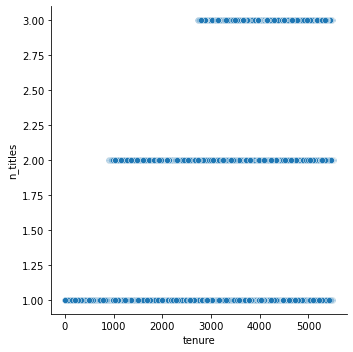

In [286]:
sns.relplot(data= e_with_t, x= 'tenure', y='n_titles')

3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [270]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [271]:
# H0 : There is no linear correlation between days and reaction time
# H⍺: There is a linear correlation between days and reaction time

r,p = stats.pearsonr(sleep.Days, sleep.Reaction)
r , p

(0.5352302262650253, 9.894096322214812e-15)

In [272]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# Continue working in your hypothesis_testing notebook.

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [288]:
contingency_table = pd.DataFrame({'codeup_student': [49,1], 'not_codeup_student': [20,30]}, index=['uses_macbook', 'doesnt_use_macbook'])
contingency_table

,codeup_student,not_codeup_student
uses_macbook,49,20
doesnt_use_macbook,1,30


Form the null and alternate hypothesis
- $H_0$: Macbook use is not related to Code up Student (They are independent)
- $H_a$: Macbook use is related to Code up Student (They are dependent)

In [289]:

chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

In [422]:
print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degrees of freedom: {degf}')
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[120041      9]
 [179958     14]]
---

chi^2 = 1.4567
p     = 0.2275
degrees of freedom: 1
We fail to reject the null hypothesis


2. Choose another 2 categorical variables from the 'mpg' dataset and perform a chi^2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [299]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [298]:
mpg.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

In [302]:
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

Form the null and alternate hypothesis
- $H_0$: Number of Cylinders and Class have no association (They are independent)
- $H_a$: Number of Cylinders and Class are associated (They are dependent)

In [305]:
observed = pd.crosstab(mpg.cyl, mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
cyl,,,,,,,
4,0,32,16,1,3,21,8
5,0,2,0,0,0,2,0
6,0,13,23,10,10,7,16
8,5,0,2,0,20,5,38


In [306]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [421]:
print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
print(f'degrees of freedom: {degf}')
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed
:
[[120038     13]
 [179962     11]]
------------------------
Expected: 

[[120041      9]
 [179958     14]]
------------------------

chi2 = 1.46
p value: 0.2275
degrees of freedom: 1
We fail to reject the null hypothesis


3. Use the data from the employees database to answer these questions:
    - Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
    - Is an employee's gender independent of whether or not they are or have been a manager?

In [318]:
query = '''
SELECT e.gender, d.dept_name
FROM employees e
JOIN dept_emp de ON de.emp_no = e.emp_no
AND to_date > NOW()
JOIN departments d USING (dept_no)'''
emp_gender = pd.read_sql(query, url)

In [319]:
emp_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   gender     240124 non-null  object
 1   dept_name  240124 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


Form the null and alternate hypothesis
- $H_0$: Employee Gender and Department have no association (They are independent)
- $H_a$: Employee Gender and Department are associated (They are dependent)

In [324]:
# Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
depts = emp_gender[(emp_gender.dept_name == 'Sales')| (emp_gender.dept_name == 'Marketing')]
depts

,gender,dept_name
104290,F,Marketing
104291,M,Marketing
104292,F,Marketing
104293,F,Marketing
104294,F,Marketing
...,...,...
240119,F,Sales
240120,M,Sales
240121,M,Sales
240122,F,Sales


In [325]:
observed = pd.crosstab(depts.gender, depts.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [419]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
print(f'degrees of freedom: {degf}')
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed
:
[[120038     13]
 [179962     11]]
------------------------
Expected: 

[[120041      9]
 [179958     14]]
------------------------

chi2 = 1.46
p value: 0.2275
degrees of freedom: 1
We fail to reject the null hypothesis


In [386]:
# Is an employee's gender independent of whether or not they are or have been a manager?

query = '''SELECT e.emp_no, e.gender, dm.dept_no
FROM employees e
LEFT JOIN dept_manager dm USING (emp_no)'''

gender_manager = pd.read_sql(query, url)

Form the null and alternate hypothesis
- $H_0$: Employee Gender and Manager status have no association (They are independent)
- $H_a$: Employee Gender and Manager status are associated (They are dependent)

In [389]:
gender_manager.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  24 non-null      object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [399]:
gender_manager['dept_no'] = gender_manager['dept_no'].fillna(0)

In [412]:
gender_manager = gender_manager.rename(columns={'dept_no' : 'manager'})

In [413]:
gender_manager['manager'] = gender_manager['manager'].apply(lambda x: x if x == 0 else 1)

In [416]:
gender_manager.manager.value_counts()

0    300000
1        24
Name: manager, dtype: int64

In [417]:
observed = pd.crosstab(gender_manager.gender, gender_manager.manager)
observed

manager,0,1
gender,,
F,120038,13
M,179962,11


In [423]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
print(f'degrees of freedom: {degf}')
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed
:
[[120038     13]
 [179962     11]]
------------------------
Expected: 

[[120041      9]
 [179958     14]]
------------------------

chi2 = 1.46
p value: 0.2275
degrees of freedom: 1
We fail to reject the null hypothesis
